## PyTorch Workflow Fundamentals

The essence of machine learning and deep learning is to take some data from the past, build an algorithm (like a neural network) to discover patterns in it and use the discovered patterns to predict the future.

There are many ways to do this and many new ways are being discovered all the time.

But let's start small.

How about we start with a straight line?

And we see if we can build a PyTorch model that learns the pattern of the straight line and matches it.

<img src="/content/drive/MyDrive/Colab Notebooks/Learn PyTorch/A PyTorch Workflow.png">

## Creating PyTorch Workflow

In [ ]:
## Import necessary libraries
import torch
from torch import nn # nn contains all of PyTorch's building blocks for a neural network
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

In [ ]:
# creating a function to print tensor
def print_tensor(tensor) -> None:
    """
    Prints the tensor provided as an argument.

    Args:
      tensor: The tensor to be printed.

    Returns:
      None
    """

    print(tensor)

In [ ]:
# creating a function to get tensor attributes
def get_tensor_attributes(tensor) -> None:
    """
    Prints the attributes (Datatype, Shape, Dimentions, Device) of the tensor provided as an argument.

    Args:
      tensor: The tensor whose attributes need to be printed.

    Returns:
      None
    """

    print(f'Datatype of tensor: {tensor.dtype}')
    print(f'No. of Dimentions: {tensor.ndim}')
    print(f'Shape of tensor: {tensor.shape}')
    print(f'Device tensor is on: {tensor.device}')

In [ ]:
# creating a funtion to visualize data
def visualize_data(X_train, y_train, X_test, y_test, preds=None) -> None:
    """
    Visualizes data points and optionally model predictions.

    Args:
      X_train: Training data features.
      y_train: Training data labels.
      X_test: Test data features.
      y_test: Test data labels.
      preds: Model predictions. Default: `None`.

    Returns:
      None
    """

    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, c='b', label='Training data')
    plt.scatter(X_test, y_test, c='g', label='Testing data')

    # visualizing model predictions is available
    if preds is not None:
        plt.scatter(X_test, preds, c='r', label='Predictions')
    plt.legend(prop={'size': 14})
    plt.xlabel('X')
    plt.ylabel('y')

In [ ]:
# creating a function to print model parameters
def get_model_parameters(model) -> None:
    """
    Prints the parameters of the provided model.

    Args:
      model: The PyTorch model whose parameters need to be printed.

    Returns:
      None
    """

    for parameter, value in model.state_dict().items():
        print(f'{parameter}: {value}')

## 1. Data (Preparing and Loading)

Data can be almost anything.. in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube)
* Audio
* DNA

Machine Learning is of two parts:
1. Get data in numerical representation
2. Build a model to learn patterns in that data

Let's create some *known* data using linear regression formula

In [ ]:
# Create 'known' parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
print_tensor(X[:10])
get_tensor_attributes(X)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
Datatype of tensor: torch.float32
No. of Dimentions: 2
Shape of tensor: torch.Size([50, 1])
Device tensor is on: cpu


In [ ]:
print_tensor(y[:10])
get_tensor_attributes(y)

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
Datatype of tensor: torch.float32
No. of Dimentions: 2
Shape of tensor: torch.Size([50, 1])
Device tensor is on: cpu


In [ ]:
# splitting the data into training data and test data
train_split = int(0.8 * len(X)) # creating a split at 80% mark

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

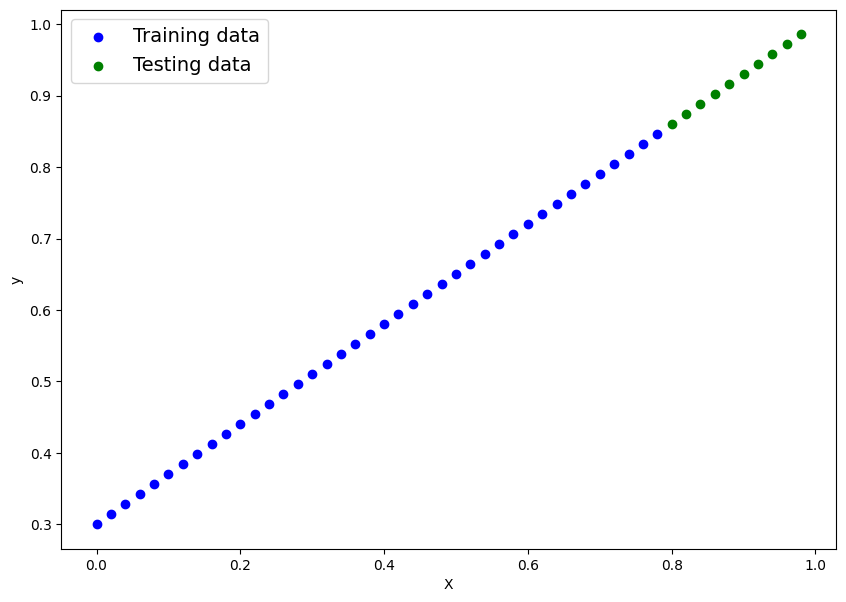

In [ ]:
# visualizing the data
visualize_data(X_train, y_train, X_test, y_test)

## A PyTorch Model on Linear Regression

What our model does:

Start with random values (weight & bias)
Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)
How does it do so?

Through two main algorithms:

* Gradient descent - https://youtu.be/IHZwWFHWa-w
* Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # defining the weight Parameter for our model
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        # defining the Bias Parameter for our model
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # defining the forward method
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

PyTorch model building essentials
* `torch.nn`: Contains all of the buildings for computational graphs (a neural
network can be considered a computational graph)
* `torch.nn.Parameter`: What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module`: The base class for all neural network modules, if you subclass it, you should overwrite `forward()`
* `torch.optim`: This is where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()`: All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

In [ ]:
# creating an instance of our model
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [ ]:
# checking the model parameters
get_model_parameters(model_0)

weights: tensor([0.3367])
bias: tensor([0.1288])


## Making prediction using torch.inference_mode()

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`